In [1]:
from pearce.mocks.kittens import cat_dict
import numpy as np

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
cosmo_params = {'simname':'chinchilla', 'Lbox':400.0, 'scale_factors':[0.658, 1.0]}

In [4]:
cat = cat_dict[cosmo_params['simname']](**cosmo_params)#construct the specified catalog!

In [5]:
cat.load(0.658, HOD='abRedMagic')

/u/ki/swmclau2/.local/lib/python2.7/site-packages/halotools-0.4.dev4134-py2.7-linux-x86_64.egg/halotools/empirical_models/factories/hod_model_factory.py:854: UserWarning: The composite model received multiple component models 
with a new_haloprop_func_dict that use the halo_nfw_conc_percentile key. 
Ignoring the one that appears in the occupation component for satellites galaxies
  warn(msg % (example_repeated_element, feature_name, gal_type))


In [6]:
cat.halocat.halo_table.keys()

['halo_upid',
 'halo_y',
 'halo_x',
 'halo_z',
 'halo_rvir',
 'halo_id',
 'halo_vx',
 'halo_vy',
 'halo_vz',
 'halo_rs',
 'halo_mvir',
 'halo_nfw_conc',
 'halo_hostid',
 'halo_local_density',
 'halo_mvir_host_halo']

In [7]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e4), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

In [8]:
print float(sum(mass_cut))/len(mass_cut)

3.10153519216e-05


In [9]:
print cat.pmass

591421440.0


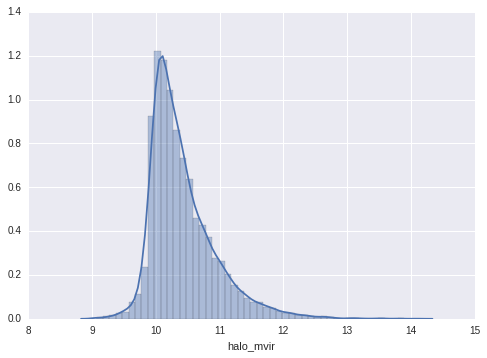

In [10]:
sns.distplot(np.log10(cat.halocat.halo_table['halo_mvir'][rand_idxs]), hist=True, kde=True)

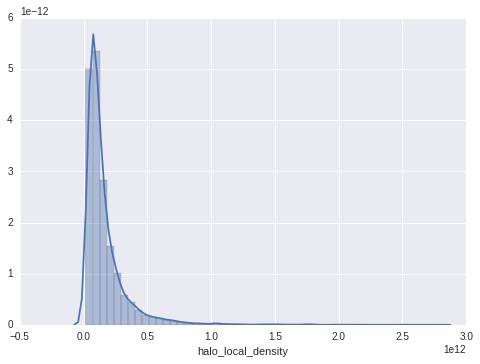

In [11]:
sns.distplot(cat.halocat.halo_table['halo_local_density'][rand_idxs], hist=True, kde=True)

In [12]:
print min(cat.halocat.halo_table['halo_local_density'][rand_idxs])
print max(cat.halocat.halo_table['halo_local_density'][rand_idxs])

14458006368.2
2.78813616557e+12


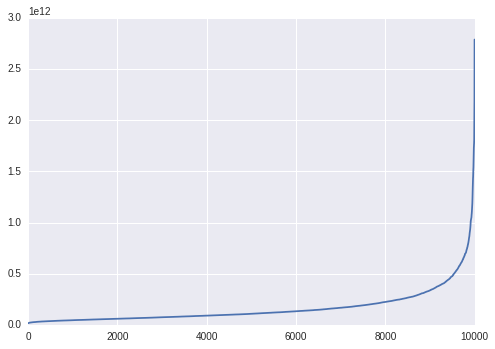

In [13]:
plt.plot(sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]))

In [14]:
vol = 4*np.pi/3*(5**3)

In [15]:
print sorted(cat.halocat.halo_table['halo_local_density'][rand_idxs]*vol/(100*cat.pmass))[:50]

[127.99999999999999, 129.99999999999997, 130.99999999999997, 130.99999999999997, 145.99999999999997, 146.99999999999997, 149.0, 152.99999999999997, 154.99999999999997, 155.99999999999997, 157.99999999999997, 158.99999999999997, 161.0, 161.0, 161.99999999999997, 162.99999999999997, 168.0, 169.99999999999994, 169.99999999999994, 171.99999999999994, 171.99999999999994, 171.99999999999994, 175.0, 178.0, 178.99999999999994, 178.99999999999994, 179.99999999999994, 179.99999999999994, 179.99999999999994, 180.99999999999994, 180.99999999999994, 180.99999999999994, 182.0, 182.0, 182.0, 182.0, 182.99999999999994, 182.99999999999994, 182.99999999999994, 183.99999999999994, 183.99999999999994, 186.99999999999994, 188.99999999999997, 188.99999999999997, 188.99999999999997, 189.99999999999994, 189.99999999999994, 189.99999999999994, 191.99999999999997, 193.99999999999997]


In [16]:
rho_b = cat.halocat.halo_table['halo_local_density']

In [17]:
rho_halo = cat.halocat.halo_table['halo_mvir']/(4*np.pi/3*cat.halocat.halo_table['halo_rvir']**3)

In [18]:
relative_density = rho_halo/rho_b

(array([  4.61043000e+05,   1.28672200e+06,   1.62360500e+06,
          1.71726700e+06,   1.64359900e+06,   1.51907000e+06,
          1.39053900e+06,   1.25172600e+06,   1.11254500e+06,
          9.82029000e+05,   8.56862000e+05,   7.43421000e+05,
          6.55612000e+05,   5.69101000e+05,   4.87304000e+05,
          4.17215000e+05,   3.58221000e+05,   3.13357000e+05,
          2.70418000e+05,   2.31844000e+05,   1.94934000e+05,
          1.62722000e+05,   1.47277000e+05,   1.18424000e+05,
          1.00593000e+05,   9.20990000e+04,   7.45280000e+04,
          6.19820000e+04,   5.08950000e+04,   4.57700000e+04,
          3.57840000e+04,   3.26960000e+04,   2.52610000e+04,
          2.37440000e+04,   1.97990000e+04,   1.83930000e+04,
          1.33540000e+04,   1.21590000e+04,   8.48800000e+03,
          9.58300000e+03,   6.66200000e+03,   6.01900000e+03,
          5.00900000e+03,   3.67000000e+03,   4.11600000e+03,
          2.74500000e+03,   2.36500000e+03,   2.16200000e+03,
        

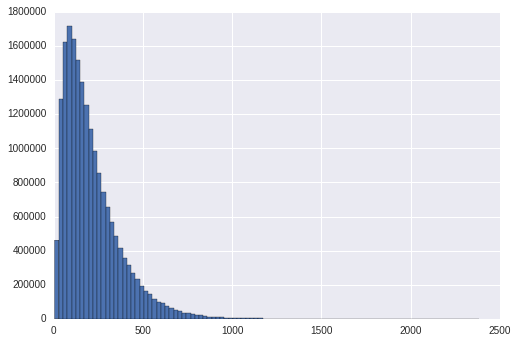

In [19]:
plt.hist(relative_density, bins=100)

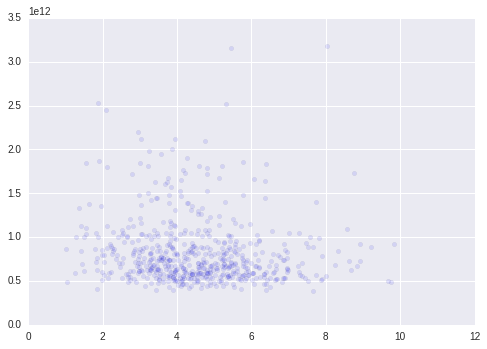

In [20]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         cat.halocat.halo_table['halo_local_density'][mass_cut], alpha=0.1)

In [21]:
rand_idxs = np.random.choice(len(cat.halocat.halo_table['halo_nfw_conc']),size = int(1e5), replace = False)
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e13

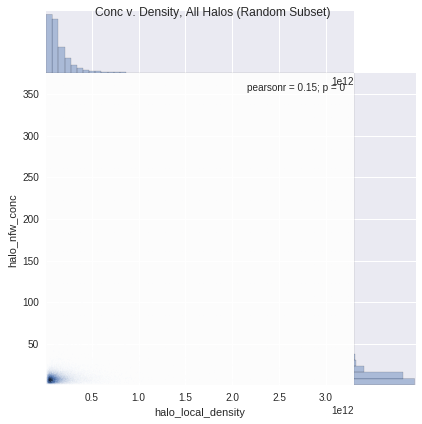

In [22]:
sns.jointplot(cat.halocat.halo_table['halo_local_density'][rand_idxs],\
         cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, All Halos (Random Subset)')

In [23]:
n_particles = cat.halocat.halo_table['halo_local_density']*(4*np.pi/300*5**3)/(cat.pmass)
rho_bar = 2048**3/(400.0**3)*(4*np.pi/300*5**3)
cat.halocat.halo_table['halo_rorb']= n_particles/rho_bar

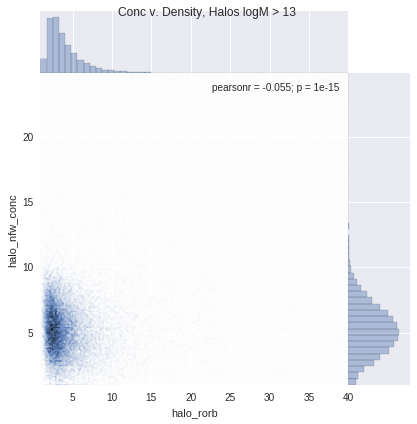

In [25]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 13')

In [32]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_nfw_conc'][mass_cut]<13)

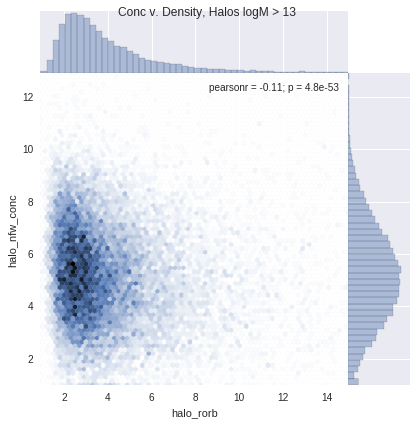

In [33]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 13')

In [26]:
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e14

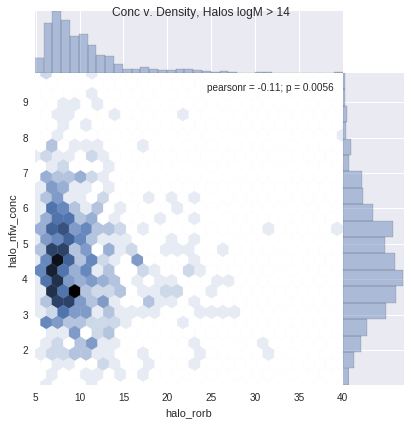

In [28]:
sns.jointplot(cat.halocat.halo_table['halo_rorb'][mass_cut],\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Density, Halos logM > 14')

In [29]:
mass_cut = cat.halocat.halo_table['halo_mvir']> 1e13

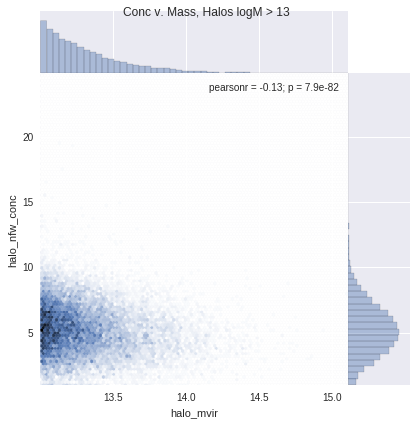

In [30]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut]),\
         cat.halocat.halo_table['halo_nfw_conc'][mass_cut],kind = 'hex', space=0)
plt.suptitle('Conc v. Mass, Halos logM > 13')

In [38]:
idxs = np.logical_and(cat.halocat.halo_table['halo_rorb'][mass_cut] < 15, cat.halocat.halo_table['halo_mvir'][mass_cut]<10**14.25)

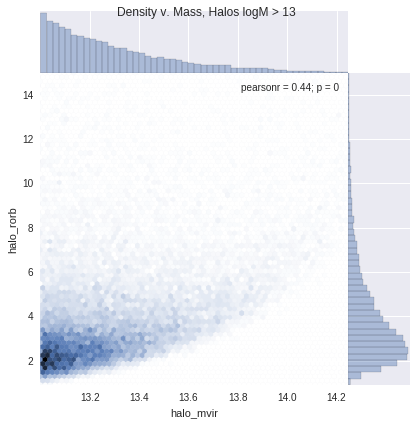

In [39]:
sns.jointplot(np.log10(cat.halocat.halo_table['halo_mvir'][mass_cut][idxs]),\
         cat.halocat.halo_table['halo_rorb'][mass_cut][idxs],kind = 'hex', space=0)
plt.suptitle('Density v. Mass, Halos logM > 13')

In [36]:
plt.scatter(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], alpha=0.1)

NameError: name 'other_density' is not defined

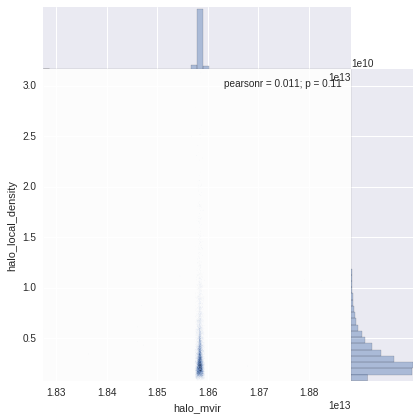

In [60]:
sns.jointplot(cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3),\
         cat.halocat.halo_table['halo_local_density'][mass_cut]/100, kind = 'hex', space=0)

In [ ]:
ratio = (cat.halocat.halo_table['halo_mvir'][mass_cut]/(4*np.pi/3*cat.halocat.halo_table['halo_rvir'][mass_cut]**3))/cat.halocat.halo_table['halo_local_density'][mass_cut]

In [ ]:
ratio.mean(), ratio.std()

In [ ]:
sns.jointplot(cat.halocat.halo_table['halo_nfw_conc'][mass_cut],\
         other_density[mass_cut], kind = 'hex', space=0)

In [ ]:
from scipy.stats import pearsonr
print pearsonr(cat.halocat.halo_table['halo_nfw_conc'][rand_idxs],\
         cat.halocat.halo_table['halo_local_density'][rand_idxs])[0]

In [ ]:
cat.model.sec_haloprop_key = 'halo_local_density'

In [ ]:
cat.model.param_dict

In [ ]:
fiducial_point = {'logM0': 12.20, 'logM1': 13.7, 'alpha': 1.02,
                      'logMmin': 12.1, 'f_c': 0.19, 'sigma_logM': 0.46}

In [ ]:
cat.model._input_model_dictionary['centrals_occupation']._get_assembias_param_dict_key(0)

In [ ]:
fiducial_point['mean_occupation_centrals_assembias_param1'] = 0.0
fiducial_point['mean_occupation_satellites_assembias_param1'] = 0.0

In [ ]:
#hod_point = [('f_c', 0.233), ('logM0', 12.0), ('sigma_logM', 0.533), 
#                   ('alpha', 1.083),('logM1', 13.5), ('logMmin', 12.233)]
hod_params = dict(fiducial_point)
cat.populate(hod_params)

In [ ]:
cat.model.param_dict

In [ ]:
cat.calc_number_density()

In [ ]:
pi_max = 40.
rp_bins = np.logspace(-1,1.25,15)
rp_points = (rp_bins[1:]+rp_bins[:-1])/2

In [ ]:
wp_vals = []
for i in xrange(10):
    cat.populate(hod_params)
    wp_vals.append(cat.calc_wp(rp_bins, pi_max))
wp_vals = np.array(wp_vals)

In [ ]:
wp_vals.shape

In [ ]:
wp = wp_vals.mean(axis=0)
cov = np.cov(wp_vals, rowvar=False)/np.sqrt(10)

In [ ]:
plt.plot(rp_points, wp)
plt.loglog()
plt.show()

In [ ]:
theta_bins = np.logspace(-2,0,15)
theta_points = (theta_bins[:-1]+theta_bins[1:])/2.0
wt = cat.calc_wt(theta_bins)

In [ ]:
plt.plot(theta_points, wt)
plt.loglog()
plt.show()

In [ ]:
rbins = np.array([  0.06309573,   0.12437607,   0.24517359,   0.34422476, 0.48329302, 0.67854546,\
           0.9526807 , 1.33756775,1.8779508 ,   2.6366509 ,   3.70186906,   5.19743987])#, 7.29722764, \
           #10.24533859,  14.38449888,  20.1958975])# , 28.35512583,  39.81071706] )
rpoints = (rbins[1:]+rbins[:-1])/2
jk_args= {'n_rands':3, 'n_sub':3}

In [ ]:
#%%timeit
#try another estimator?
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()

In [ ]:
#%%timeit
#try another estimator?
jk_args= {'n_rands':50, 'n_sub':3}
xi, cov = cat.calc_xi(rbins, jk_args=jk_args)

In [ ]:
errs = np.sqrt(np.diag(cov))
print errs

In [ ]:
plt.errorbar(rpoints,xi,yerr=errs, fmt='o-')
plt.loglog()
plt.show()